## Coding Exercise #0308

### 1. Classification with Tree:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

In [6]:
def load_boston():
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    return {'data': data, 'target': target, 'DESCR': 'boston dataset', 'feature_names': ['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']}

#### 1.1. Read in data:

In [7]:
# Go to the directory where the data file is located.
# os.chdir(r'~~')                # Please, replace the path with your own.

In [8]:
# Read the already pre-processed data.
df = pd.read_csv('data_titanic_2.csv', header='infer')

In [9]:
df.shape

(889, 21)

In [10]:
df.head(3)

,Embarked_Q,Embarked_S,Sex_male,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_2,Pclass_3,"Age_(21.0, 30.0]","Age_(30.0, 35.0]","Age_(35.0, 80.0]",Survived
0,False,True,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,True,False,False,0
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,1
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,1


In [11]:
X = df.drop(columns=['Survived'])
Y = df.Survived

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

#### 1.2. Tree hyperparameter optimization:

In [13]:
depth_grid = np.arange(1,21)
min_samples_leaf_grid = np.arange(10,31)
max_leaf_nodes_grid = np.arange(2,21)
parameters = {'max_depth':depth_grid, 'min_samples_leaf':min_samples_leaf_grid, 'max_leaf_nodes':max_leaf_nodes_grid}

In [14]:
gridCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10, n_jobs = -1)        # estimator = an instance of DecisionTreeClassifier.
gridCV.fit(X_train, Y_train);
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']
best_max_leaf_nodes = gridCV.best_params_['max_leaf_nodes']

In [15]:
print("Tree best depth : " + str(best_depth))
print("Tree best min_samples_leaf : " + str(best_min_samples_leaf))
print("Tree best max_leaf_nodes : " + str(best_max_leaf_nodes))

Tree best depth : 3
Tree best min_samples_leaf : 23
Tree best max_leaf_nodes : 6


In [16]:
DTC_best = DecisionTreeClassifier(max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,max_leaf_nodes=best_max_leaf_nodes)
DTC_best.fit(X_train, Y_train);
Y_pred = DTC_best.predict(X_test)
print( "Tree best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Tree best accuracy : 0.82


### 2. Regression with Tree:

#### 2.1. Read in data:

In [17]:
data = load_boston()

In [18]:
# Display the description on the data.
print(data['DESCR'])

boston dataset


In [19]:
# The explanatory variables.
X = data['data']
header = data['feature_names']

In [20]:
# The response variable.
# This is a numeric variable representing the house price.
Y = data['target']
Y = Y.reshape(-1, 1)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

#### 2.2. Convert the data into a DataFrame and explore:

In [22]:
df = pd.DataFrame(np.append(X,Y,axis = 1))
df.columns = list(header)+['PRICE']

In [23]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
# Pair-wise correlation matrix.
np.round(df.corr(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


#### 2.3. Tree hyperparameter optimization:

In [25]:
depth_grid = np.arange(1,21)
min_samples_leaf_grid = np.arange(10,31)
max_leaf_nodes_grid = np.arange(2,21)
parameters = {'max_depth':depth_grid, 'min_samples_leaf':min_samples_leaf_grid, 'max_leaf_nodes':max_leaf_nodes_grid}

In [26]:
gridCV = GridSearchCV(DecisionTreeRegressor(), parameters, cv=10, n_jobs = -1)      # estimator = an instance of DecisionTreeRegressor.
gridCV.fit(X_train, Y_train)
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']
best_max_leaf_nodes = gridCV.best_params_['max_leaf_nodes']

In [27]:
print("Tree best depth : " + str(best_depth))
print("Tree best min_samples_leaf : " + str(best_min_samples_leaf))
print("Tree best max_leaf_nodes : " + str(best_max_leaf_nodes))

Tree best depth : 9
Tree best min_samples_leaf : 15
Tree best max_leaf_nodes : 14


In [28]:
DTR_best = DecisionTreeRegressor(max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,max_leaf_nodes=best_max_leaf_nodes)
DTR_best.fit(X_train, Y_train)
Y_pred = DTR_best.predict(X_test)
print( "Tree best RMSE : " + str(np.round(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)),3)))

Tree best RMSE : 4.113


NOTE: We can compare the above result with that obtained using linear regression where the RMSE was 5.33.

In [29]:
from sklearn.tree import plot_tree
from sklearn import tree

[Text(0.5113636363636364, 0.9285714285714286, 'x[12] <= 9.725\nsquared_error = 81.081\nsamples = 354\nvalue = 22.488'),
 Text(0.3181818181818182, 0.7857142857142857, 'x[5] <= 7.435\nsquared_error = 78.714\nsamples = 144\nvalue = 29.715'),
 Text(0.2727272727272727, 0.6428571428571429, 'x[5] <= 6.797\nsquared_error = 42.639\nsamples = 125\nvalue = 27.394'),
 Text(0.18181818181818182, 0.5, 'x[8] <= 6.5\nsquared_error = 32.819\nsamples = 88\nvalue = 25.075'),
 Text(0.13636363636363635, 0.35714285714285715, 'x[5] <= 6.428\nsquared_error = 11.95\nsamples = 70\nvalue = 23.894'),
 Text(0.09090909090909091, 0.21428571428571427, 'x[5] <= 6.066\nsquared_error = 6.249\nsamples = 43\nvalue = 22.17'),
 Text(0.045454545454545456, 0.07142857142857142, 'squared_error = 7.381\nsamples = 15\nvalue = 20.173'),
 Text(0.13636363636363635, 0.07142857142857142, 'squared_error = 2.363\nsamples = 28\nvalue = 23.239'),
 Text(0.18181818181818182, 0.21428571428571427, 'squared_error = 8.751\nsamples = 27\nvalue = 

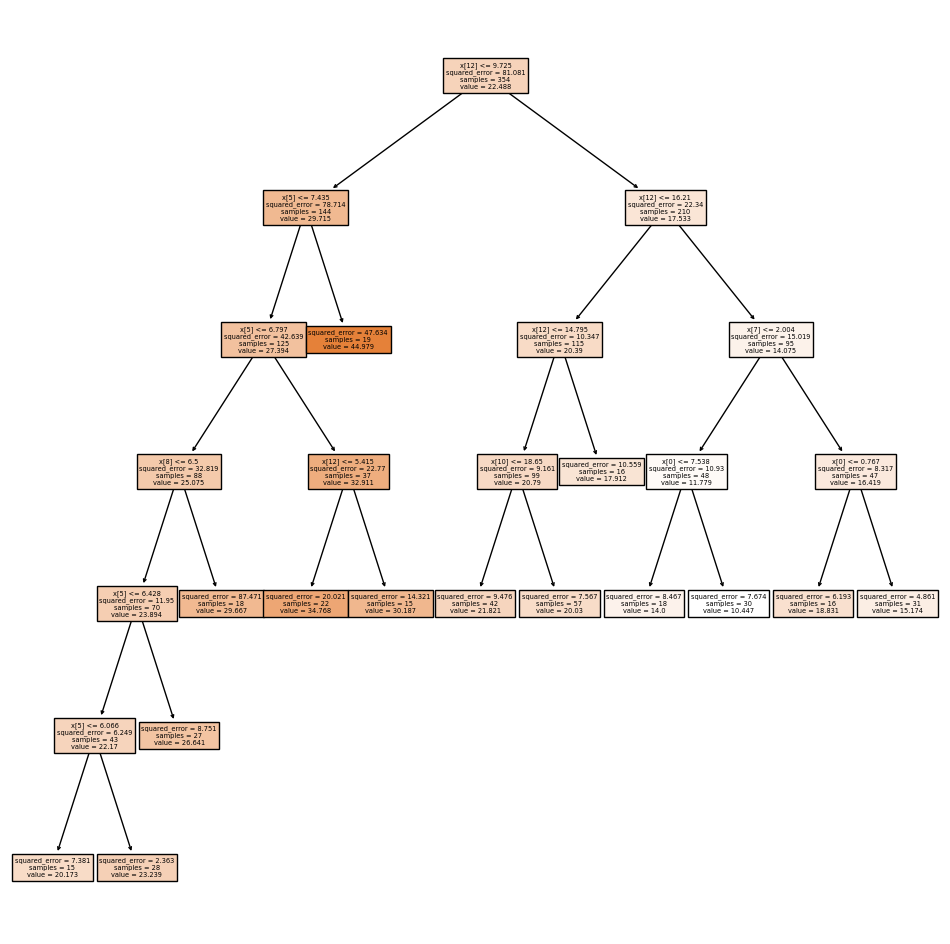

In [30]:
fig, ax= plt.subplots(figsize=(12,12))
plot_tree(DTR_best,filled=True)

[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.467\nsamples = 622\nvalue = [391, 231]'),
 Text(0.2, 0.625, 'x[16] <= 0.5\ngini = 0.385\nsamples = 215\nvalue = [56, 159]'),
 Text(0.1, 0.375, 'gini = 0.104\nsamples = 109\nvalue = [6, 103]'),
 Text(0.3, 0.375, 'x[1] <= 0.5\ngini = 0.498\nsamples = 106\nvalue = [50, 56]'),
 Text(0.2, 0.125, 'gini = 0.454\nsamples = 46\nvalue = [16, 30]'),
 Text(0.4, 0.125, 'gini = 0.491\nsamples = 60\nvalue = [34, 26]'),
 Text(0.8, 0.625, 'x[16] <= 0.5\ngini = 0.291\nsamples = 407\nvalue = [335, 72]'),
 Text(0.7, 0.375, 'x[15] <= 0.5\ngini = 0.381\nsamples = 172\nvalue = [128, 44]'),
 Text(0.6, 0.125, 'gini = 0.455\nsamples = 97\nvalue = [63, 34]'),
 Text(0.8, 0.125, 'gini = 0.231\nsamples = 75\nvalue = [65, 10]'),
 Text(0.9, 0.375, 'gini = 0.21\nsamples = 235\nvalue = [207, 28]')]

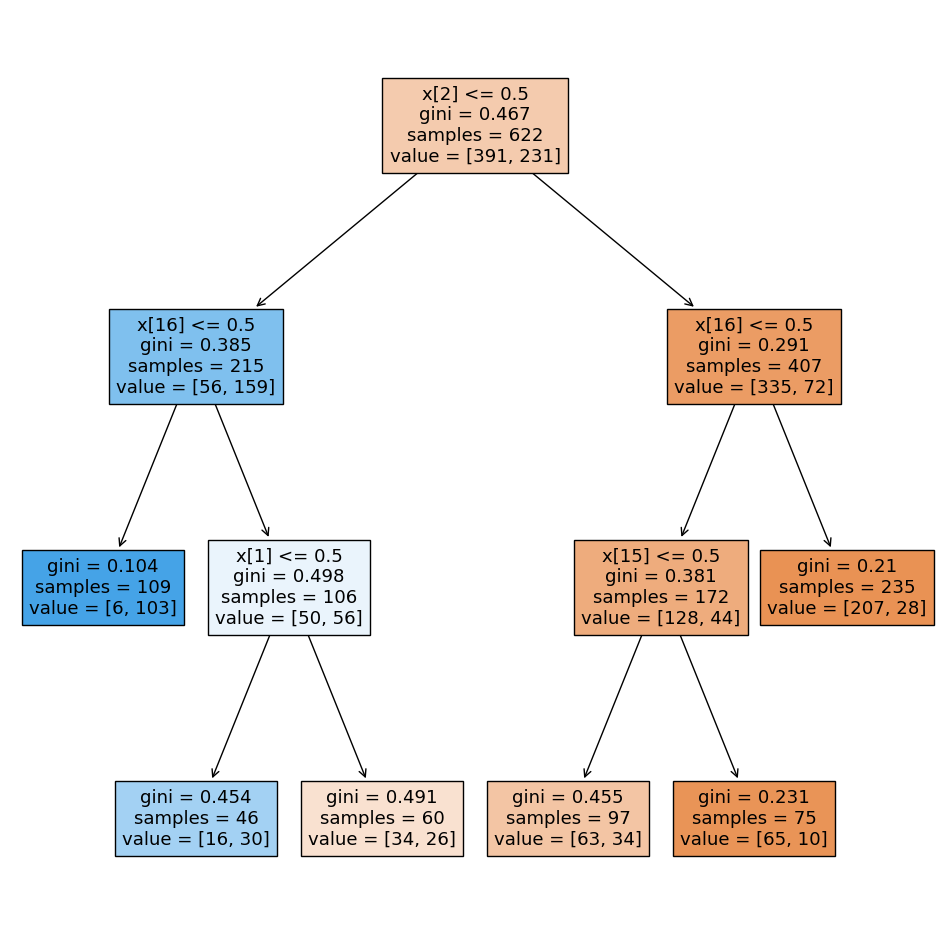

In [31]:
fig, ax= plt.subplots(figsize=(12,12))
plot_tree(DTC_best,filled=True)